In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats
import pylab
from sklearn.decomposition import PCA
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df_lu = pd.read_csv("Luxembourg_new.csv")
df_de = pd.read_csv("Deutschland_new.csv")
df_be = pd.read_csv("Belgien_new.csv")
df_fr = pd.read_csv("Frankreich_new.csv")


df_lu = df_lu.drop(['stadt'], axis=1)
df_de = df_de.drop(['stadt'], axis=1)
df_be = df_be.drop(['stadt'], axis=1)
df_fr = df_fr.drop(['stadt'], axis=1)

In [3]:
corr = df_lu.corr()
display(corr)

,baujahr,Bevölkerung,Distanz,kaufpreis,Wohnung,Haus,fläche_m2,schlafzimmer,badezimmer,parkplätze,garten
baujahr,1.000000,-0.055426,-0.003947,-0.020277,0.193644,-0.193644,-0.164923,-0.221324,-0.064197,-0.142331,-0.070555
Bevölkerung,-0.055426,1.000000,-0.192081,-0.048601,0.142783,-0.142783,-0.140240,-0.134555,0.000684,-0.139880,-0.117012
Distanz,-0.003947,-0.192081,1.000000,-0.379278,-0.226573,0.226573,0.138906,0.166161,-0.029912,0.216195,0.120256
kaufpreis,-0.020277,-0.048601,-0.379278,1.000000,-0.336794,0.336794,0.596448,0.529277,0.478718,0.276490,0.206733
Wohnung,0.193644,0.142783,-0.226573,-0.336794,1.000000,-1.000000,-0.699029,-0.704079,-0.343540,-0.451972,-0.520768
Haus,-0.193644,-0.142783,0.226573,0.336794,-1.000000,1.000000,0.699029,0.704079,0.343540,0.451972,0.520768
fläche_m2,-0.164923,-0.140240,0.138906,0.596448,-0.699029,0.699029,1.000000,0.791151,0.555124,0.516524,0.371273
schlafzimmer,-0.221324,-0.134555,0.166161,0.529277,-0.704079,0.704079,0.791151,1.000000,0.499633,0.453135,0.372648
badezimmer,-0.064197,0.000684,-0.029912,0.478718,-0.343540,0.343540,0.555124,0.499633,1.000000,0.241569,0.207813
parkplätze,-0.142331,-0.139880,0.216195,0.276490,-0.451972,0.451972,0.516524,0.453135,0.241569,1.000000,0.319928


Folgende Variablen haben einen geringen oder keinen Effekt auf den Kaufpreis:

baujahr,Bevölkerung, garten

Folgende Variablen sind nicht unabhängig:

schlafzimmer/badezimmer/fläche

Weitere problematische Variablen:

Haus/Wohnung sagen das gleiche aus


Lösung, Die Spalten Baujahr, Bevölkerung, Garten, Schlafzimmer und Wohnung entfernen

In [4]:
df_lu = df_lu.drop(['baujahr', 'Bevölkerung', 'Wohnung', 'garten'], axis=1)

In [5]:
corr = df_de.corr()
display(corr)

,baujahr,Bevölkerung,DistanzKöln,DistanzSaarbrücken,DistanzFrankfurt,DistanzLuxemburg,kaufpreis,fläche_m2,schlafzimmer,badezimmer,parkplätze,garten,Haus,Wohnung
baujahr,1.000000,0.238308,0.324919,-0.219065,0.309598,-0.326221,0.290831,-0.235787,-0.179468,0.011552,-0.122148,-0.261110,-0.334806,0.230509
Bevölkerung,0.238308,1.000000,0.203536,-0.290345,-0.318870,0.094877,0.036547,-0.225295,-0.252042,-0.229434,-0.146320,-0.515363,-0.490572,0.439813
DistanzKöln,0.324919,0.203536,1.000000,-0.758581,0.256246,-0.041826,0.323300,0.058767,-0.112838,0.043758,-0.223071,-0.010630,0.072017,-0.029975
DistanzSaarbrücken,-0.219065,-0.290345,-0.758581,1.000000,0.106815,-0.366390,-0.131943,0.097455,0.102778,-0.025138,0.328908,0.066893,-0.043834,-0.006302
DistanzFrankfurt,0.309598,-0.318870,0.256246,0.106815,1.000000,-0.839522,-0.110793,-0.244850,-0.227127,-0.106235,0.038178,0.107516,0.060372,-0.093091
DistanzLuxemburg,-0.326221,0.094877,-0.041826,-0.366390,-0.839522,1.000000,0.208426,0.379847,0.361871,0.172074,-0.095642,0.123817,0.195430,-0.083370
kaufpreis,0.290831,0.036547,0.323300,-0.131943,-0.110793,0.208426,1.000000,0.543763,0.440265,0.248814,0.035863,0.100705,0.100693,-0.143976
fläche_m2,-0.235787,-0.225295,0.058767,0.097455,-0.244850,0.379847,0.543763,1.000000,0.667398,0.524481,0.153333,0.333249,0.421389,-0.417987
schlafzimmer,-0.179468,-0.252042,-0.112838,0.102778,-0.227127,0.361871,0.440265,0.667398,1.000000,0.610409,0.123521,0.281912,0.436323,-0.332861
badezimmer,0.011552,-0.229434,0.043758,-0.025138,-0.106235,0.172074,0.248814,0.524481,0.610409,1.000000,0.031806,0.084243,0.256751,-0.294196


Folgende Variablen haben einen geringen oder keinen Effekt auf den Kaufpreis:

Bevölkerung,DistanzSaarbrücken,DistanzFrankfurt,parkplätze,garten,Haus,Wohnung

Folgende Variablen sind nicht unabhängig:

DistanzKöln/DistanzSaarbrücken
DistanzLuxemburg/DistanzFrankfurt
fläche_m2/schlafzimmer/badezimmer
garten/bevölkerung
garten/Haus

Weitere problematische Variablen:

Haus/Wohnung sagen das gleiche aus


Lösung, Die Spalten Bevölkerung,DistanzSaarbrücken,DistanzFrankfurt,parkplätze,garten,Haus,Wohnung entfernen


In [6]:
df_de = df_de.drop([ 'parkplätze', 'garten', 'schlafzimmer','Wohnung','Haus','DistanzSaarbrücken','DistanzFrankfurt'], axis=1)

In [7]:
corr = df_be.corr()
display(corr)

,baujahr,Bevölkerung,DistanzNamur,DistanzMaastricht,DistanzBrüssel,DistanzLuxemburg,kaufpreis,fläche_m2,schlafzimmer,badezimmer,parkplätze,garten,Haus,Wohnung
baujahr,1.000000,-0.001714,-0.023517,-0.098231,-0.064445,0.062162,-0.146003,-0.428229,-0.373506,-0.220223,0.078422,-0.216175,-0.442224,0.408917
Bevölkerung,-0.001714,1.000000,-0.085209,-0.225476,-0.135462,0.132368,-0.005618,-0.009767,-0.054311,-0.012655,0.003520,-0.040708,-0.073895,0.069785
DistanzNamur,-0.023517,-0.085209,1.000000,0.082594,0.874204,-0.501867,0.022409,0.025868,0.050316,0.066126,-0.150528,0.039247,0.035071,-0.007441
DistanzMaastricht,-0.098231,-0.225476,0.082594,1.000000,0.443713,-0.801157,0.051428,0.074378,0.085106,0.063272,-0.025577,0.012976,0.152693,-0.130984
DistanzBrüssel,-0.064445,-0.135462,0.874204,0.443713,1.000000,-0.798737,0.046738,0.054754,0.071745,0.095700,-0.125149,0.029942,0.078658,-0.048741
DistanzLuxemburg,0.062162,0.132368,-0.501867,-0.801157,-0.798737,1.000000,-0.049484,-0.038539,-0.044362,-0.076487,0.071189,-0.013010,-0.078779,0.051081
kaufpreis,-0.146003,-0.005618,0.022409,0.051428,0.046738,-0.049484,1.000000,0.709108,0.576360,0.447534,0.015753,0.125009,0.315378,-0.310386
fläche_m2,-0.428229,-0.009767,0.025868,0.074378,0.054754,-0.038539,0.709108,1.000000,0.716850,0.502049,-0.038375,0.201417,0.521173,-0.505891
schlafzimmer,-0.373506,-0.054311,0.050316,0.085106,0.071745,-0.044362,0.576360,0.716850,1.000000,0.571885,-0.056045,0.221232,0.597685,-0.575645
badezimmer,-0.220223,-0.012655,0.066126,0.063272,0.095700,-0.076487,0.447534,0.502049,0.571885,1.000000,0.032798,0.071176,0.170985,-0.182934


Folgende Variablen haben einen geringen oder keinen Effekt auf den Kaufpreis:

baujahr,Bevölkerung,DistanzNamur,DistanzMaastricht,DistanzBrüssel,DistanzLuxemburg,parkplätze,garten

Folgende Variablen sind nicht unabhängig:

fläche_m2/schlafzimmer/badezimmer

Weitere problematische Variablen:

Haus/Wohnung sagen das gleiche aus


Lösung, Spalten : baujahr,Bevölkerung,DistanzNamur,DistanzMaastricht,DistanzBrüssel,DistanzLuxemburg,parkplätze,garten, schlafzimmer,Wohnung entfernen

In [8]:
df_be = df_be.drop(['parkplätze', 'baujahr','Bevölkerung','DistanzNamur','DistanzMaastricht','DistanzLuxemburg','DistanzBrüssel','garten','schlafzimmer','Wohnung'], axis=1)

In [9]:
corr = df_fr.corr()
display(corr)

,baujahr,Bevölkerung,DistanzSaarbrücken,DistanzThionville,DistanzMetz,DistanzLuxemburg,kaufpreis,fläche_m2,schlafzimmer,badezimmer,parkplätze,garten,Haus,Wohnung
baujahr,1.000000,0.107828,-0.253370,0.004116,-0.133462,0.083871,-0.252867,-0.490593,-0.344348,-0.217142,-0.285379,-0.055647,-0.159186,0.141378
Bevölkerung,0.107828,1.000000,-0.122906,-0.275979,-0.432458,0.004621,-0.008747,-0.064687,-0.002146,-0.001225,-0.017856,0.143572,0.024266,-0.016118
DistanzSaarbrücken,-0.253370,-0.122906,1.000000,-0.223381,0.335715,-0.612337,0.068159,0.030328,0.025346,0.085251,0.073470,-0.303853,-0.343330,0.268407
DistanzThionville,0.004116,-0.275979,-0.223381,1.000000,0.551326,0.734000,-0.174182,-0.076964,0.080834,0.027626,0.020701,0.118729,0.105564,-0.183959
DistanzMetz,-0.133462,-0.432458,0.335715,0.551326,1.000000,-0.010024,-0.027642,-0.018099,0.055625,0.107827,0.027067,-0.120854,-0.168999,0.079224
DistanzLuxemburg,0.083871,0.004621,-0.612337,0.734000,-0.010024,1.000000,-0.122754,0.010969,0.100858,0.016025,-0.011760,0.343752,0.368151,-0.364139
kaufpreis,-0.252867,-0.008747,0.068159,-0.174182,-0.027642,-0.122754,1.000000,0.621748,0.344458,0.270760,0.234518,0.237889,0.397641,-0.346340
fläche_m2,-0.490593,-0.064687,0.030328,-0.076964,-0.018099,0.010969,0.621748,1.000000,0.375263,0.249109,0.286382,0.216396,0.353987,-0.311999
schlafzimmer,-0.344348,-0.002146,0.025346,0.080834,0.055625,0.100858,0.344458,0.375263,1.000000,0.766733,0.188404,0.218168,0.399457,-0.393731
badezimmer,-0.217142,-0.001225,0.085251,0.027626,0.107827,0.016025,0.270760,0.249109,0.766733,1.000000,0.130637,0.044483,0.220205,-0.190202


Folgende Variablen haben einen geringen oder keinen Effekt auf den Kaufpreis:

Bevölkerung	DistanzSaarbrücken	DistanzThionville	DistanzMetz,	DistanzLuxemburg

Folgende Variablen sind nicht unabhängig:

fläche_m2/schlafzimmer/badezimmer
garten/Haus

Weitere problematische Variablen:

Haus/Wohnung sagen das gleiche aus


Lösung, Spalten : Bevölkerung,DistanzSaarbrücken,DistanzThionville,DistanzMetz,DistanzLuxemburg,Wohnung, Garten,Schlafzimmer entfernen


In [10]:
df_fr = df_fr.drop(['Bevölkerung','schlafzimmer', 'DistanzSaarbrücken','DistanzThionville','DistanzMetz','DistanzLuxemburg','Wohnung','garten'], axis=1)

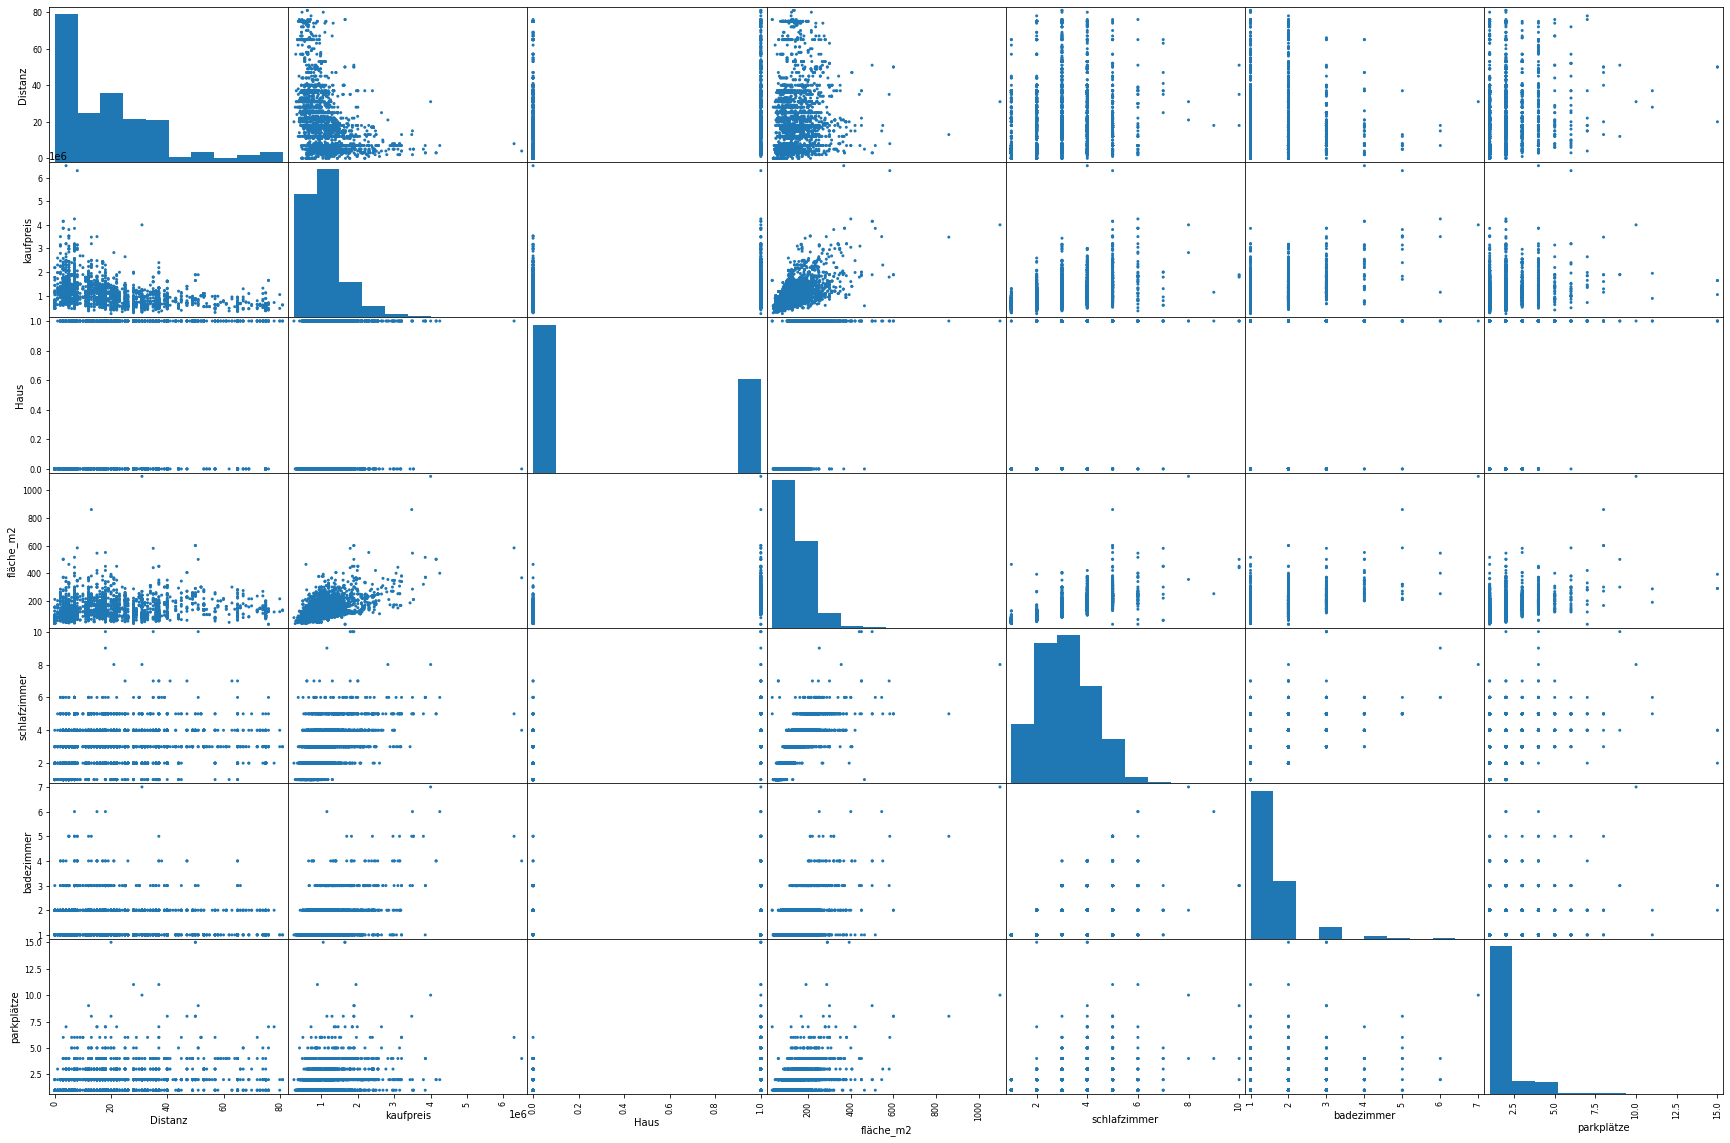

In [11]:
pd.plotting.scatter_matrix(df_lu, alpha = 1, figsize = (30,20))
plt.show() 

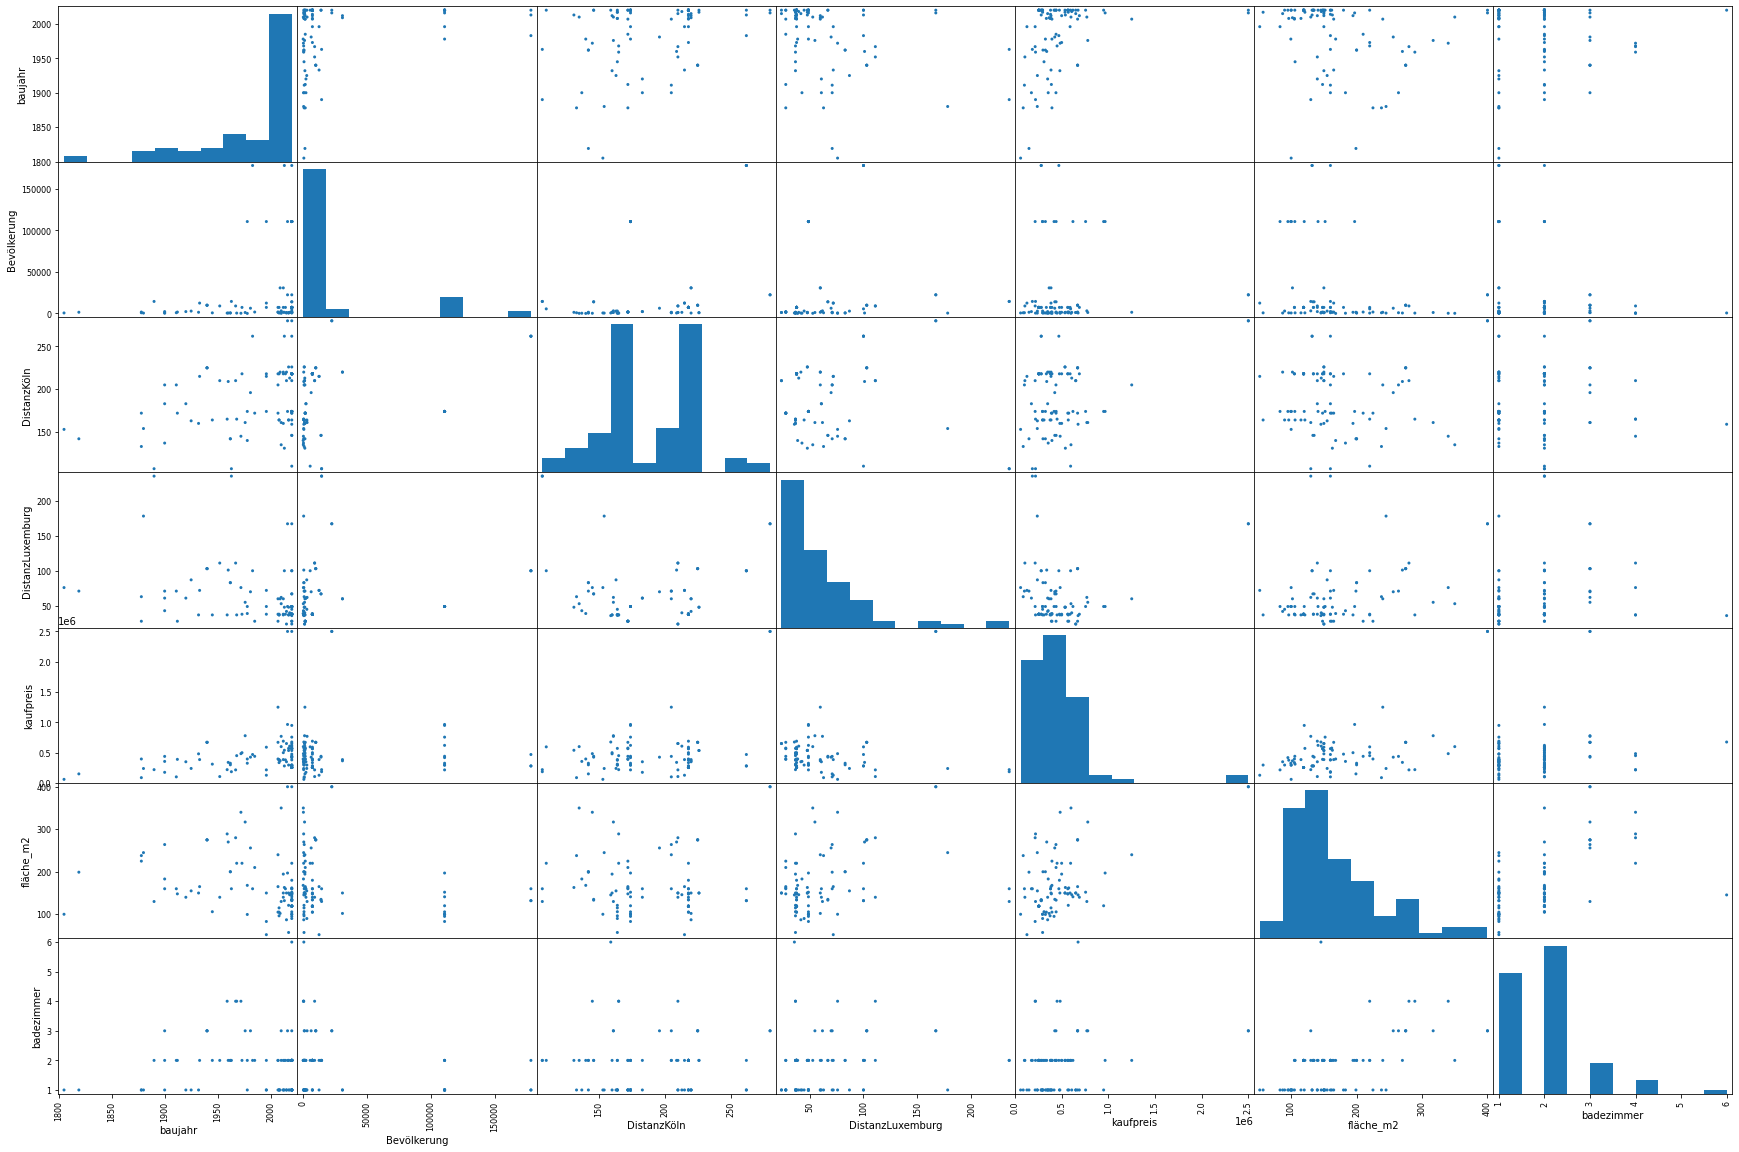

In [12]:
pd.plotting.scatter_matrix(df_de, alpha = 1, figsize = (30,20))
plt.show() 

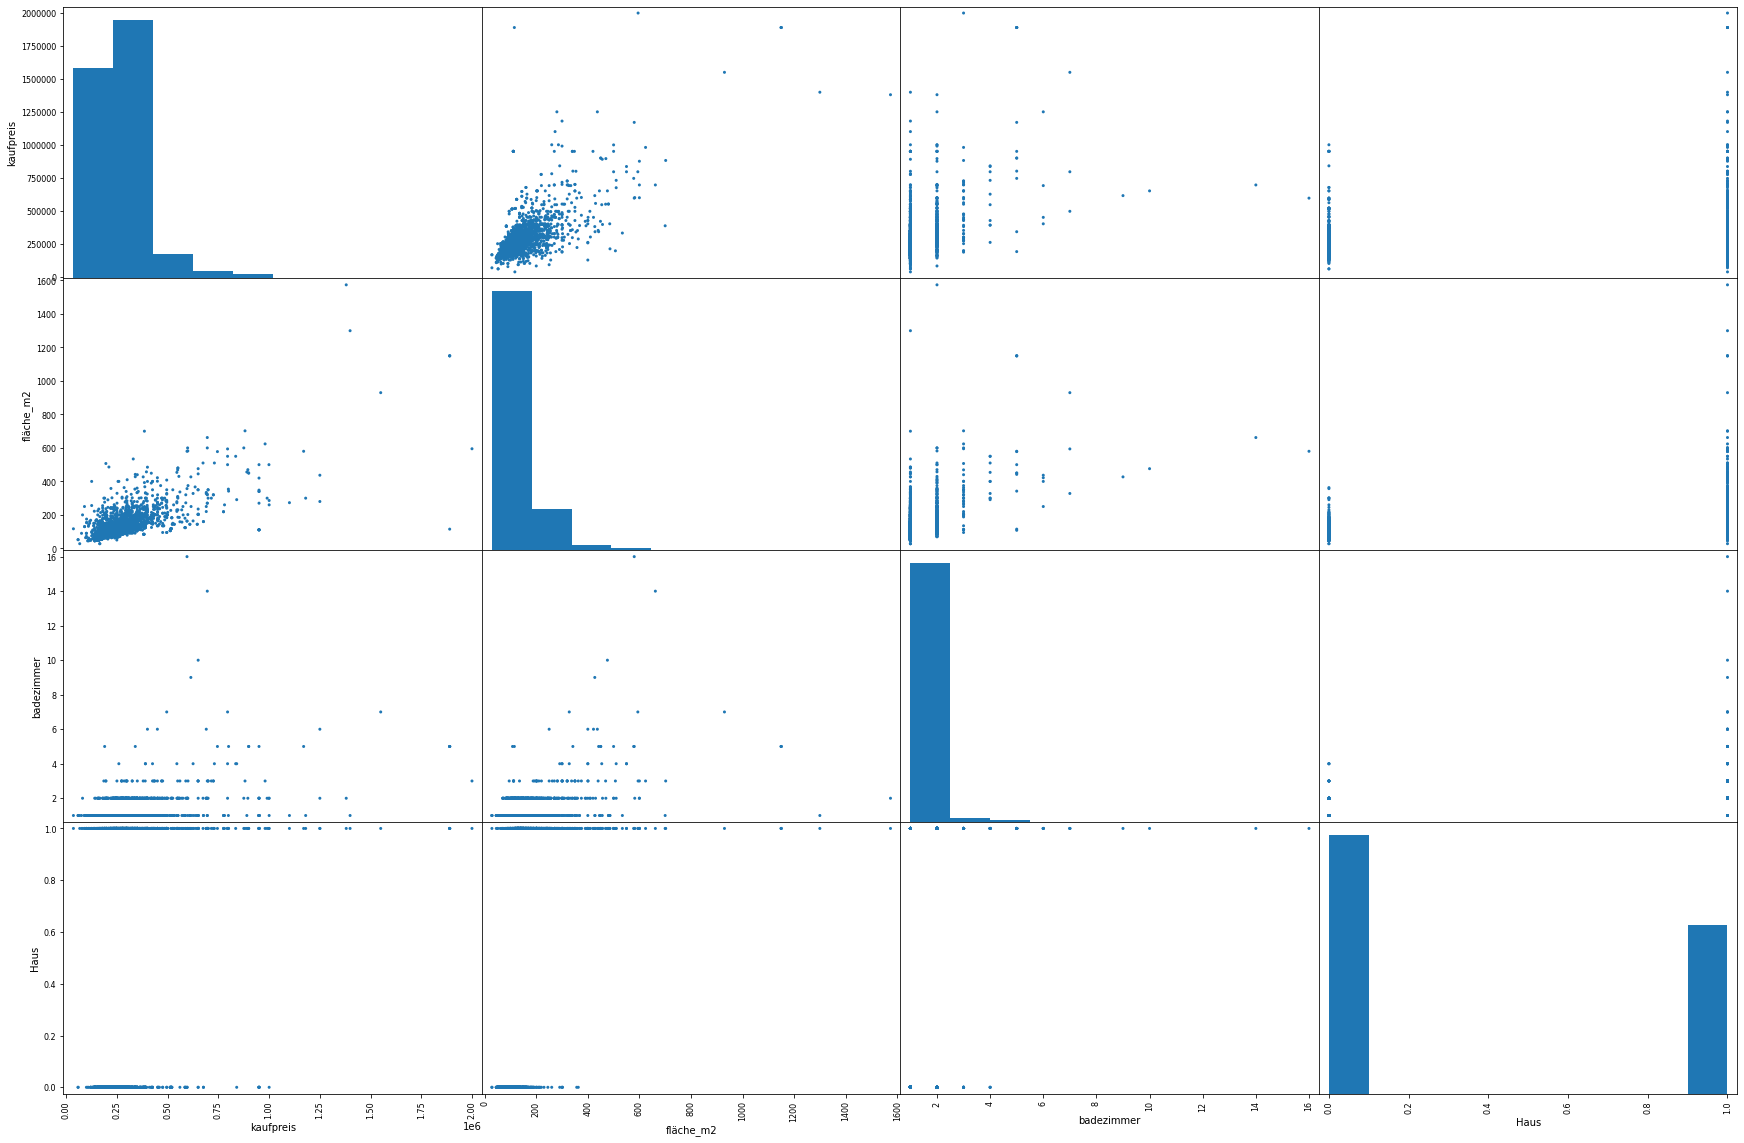

In [13]:
pd.plotting.scatter_matrix(df_be, alpha = 1, figsize = (30,20))
plt.show() 

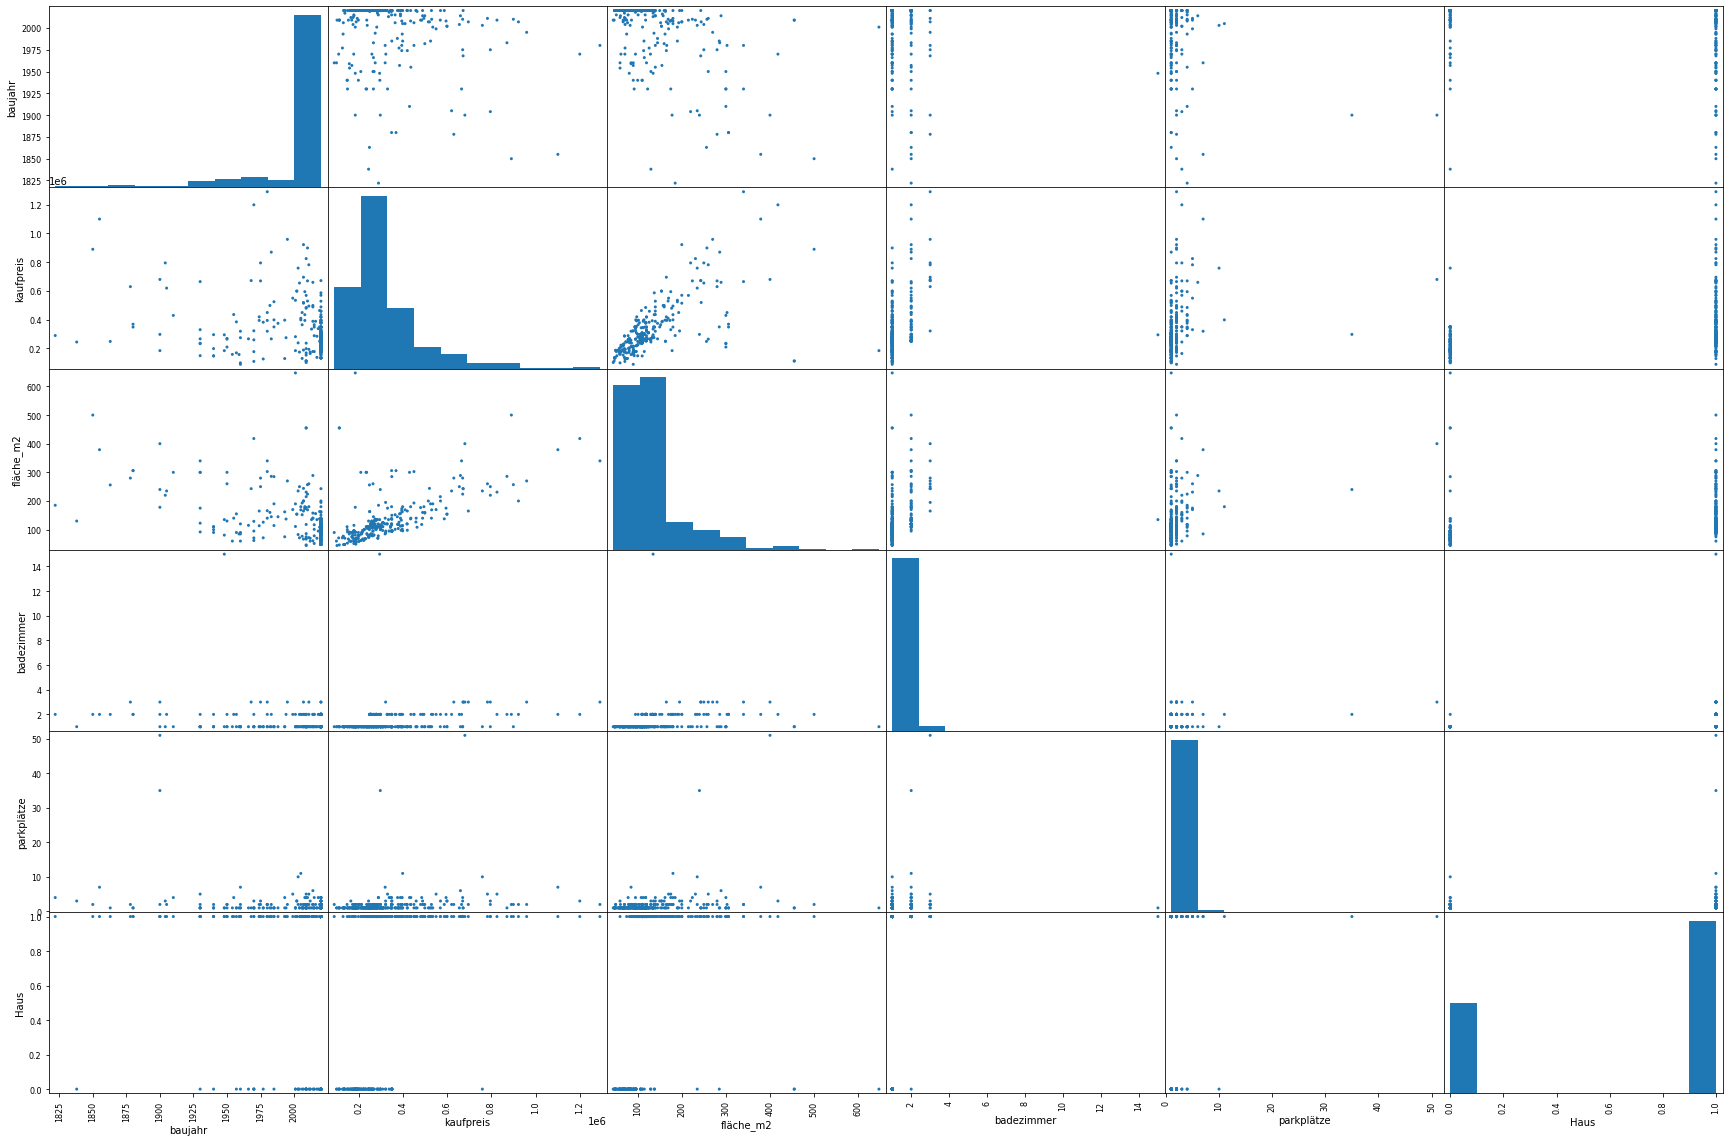

In [14]:
pd.plotting.scatter_matrix(df_fr, alpha = 1, figsize = (30,20))
plt.show() 

# Fitting Model und White's/Breusch Pagan Test (Homoskedastizität) in Luxemburg

In [15]:
#define our input variable and our output variable
X = df_lu.drop('kaufpreis', axis = 1)
Y = df_lu[['kaufpreis']]
# split dataset into training and testing portion
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
#create an instance of our model
regression_model = LinearRegression()
#fit the model
regression_model.fit(x_train, y_train)
# define our input
X2 = sm.add_constant(X)
#create an OLS model
model = sm.OLS(Y, X2)
#fit the data
est = model.fit()
#running the white's test
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# Breusch Pagan Test
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
print(est.summary())
est.predict([[1,16,1,130,3,2,2]])

1.2992797813063924e-169 2.460424702980191e-198
----------------------------------------------------------------------------------------------------
2.9829014166605606e-93 4.813549412830167e-100
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     879.1
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:42:41   Log-Likelihood:                -47900.
No. Observations:                3389   AIC:                         9.581e+04
Df Residuals:                    3382   BIC:                         9.586e+04
Df Model:                           6                                    

array([1110350.3708487])

In [16]:
const = 1
distance = 100
Haus = 1
fläche_m2 = 300
schlafzimmer = 4
badezimmer = 2
parkplätze = 2

print(est.predict([[const,distance,Haus,fläche_m2, schlafzimmer, badezimmer, parkplätze]]))

[572804.44398605]


# Fitting Model und White's/Breusch Pagan Test (Homoskedastizität) in Deutschland

In [17]:
#define our input variable and our output variable
X = df_de.drop('kaufpreis', axis = 1)
Y = df_de[['kaufpreis']]
# split dataset into training and testing portion
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
#create an instance of our model
regression_model = LinearRegression()
#fit the model
regression_model.fit(x_train, y_train)
# define our input
X2 = sm.add_constant(X)
#create an OLS model
model = sm.OLS(Y, X2)
#fit the data
est = model.fit()
#running the white's test
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# Breusch Pagan Test
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# > 0.05 p wert bedeutet dass die Variance der Estimates klein sind und unser Modell signifikante Predictions machen kann.
print(est.summary())

8.297247185483953e-08 4.66841281294195e-25
----------------------------------------------------------------------------------------------------
5.5756980557161115e-08 1.3531079965710835e-10
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     15.96
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           3.34e-12
Time:                        10:42:41   Log-Likelihood:                -1274.1
No. Observations:                  92   AIC:                             2562.
Df Residuals:                      85   BIC:                             2580.
Df Model:                           6                                        

# Fitting Model und White's/Breusch Pagan Test (Homoskedastizität) in Frankreich

In [18]:
#define our input variable and our output variable
X = df_fr.drop('kaufpreis', axis = 1)
Y = df_fr[['kaufpreis']]
# split dataset into training and testing portion
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
#create an instance of our model
regression_model = LinearRegression()
#fit the model
regression_model.fit(x_train, y_train)
# define our input
X2 = sm.add_constant(X)
#create an OLS model
model = sm.OLS(Y, X2)
#fit the data
est = model.fit()
#running the white's test
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# Breusch Pagan Test
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# > 0.05 p wert bedeutet dass die Variance der Estimates klein sind und unser Modell signifikante Predictions machen kann.
print(est.summary())

4.757639502077627e-45 2.3649554977318464e-88
----------------------------------------------------------------------------------------------------
6.302159626417176e-41 2.3809941627694006e-60
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     54.16
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.15e-41
Time:                        10:42:41   Log-Likelihood:                -4612.3
No. Observations:                 350   AIC:                             9237.
Df Residuals:                     344   BIC:                             9260.
Df Model:                           5                                       

# Fitting Model und White's/Breusch Pagan Test (Homoskedastizität) in Belgien

In [19]:
#define our input variable and our output variable
X = df_be.drop('kaufpreis', axis = 1)
Y = df_be[['kaufpreis']]
# split dataset into training and testing portion
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
#create an instance of our model
regression_model = LinearRegression()
#fit the model
regression_model.fit(x_train, y_train)
# define our input
X2 = sm.add_constant(X)
#create an OLS model
model = sm.OLS(Y, X2)
#fit the data
est = model.fit()
#running the white's test
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# Breusch Pagan Test
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# > 0.05 p wert bedeutet dass die Variance der Estimates klein sind und unser Modell signifikante Predictions machen kann.
print(est.summary())

2.344649371669214e-55 4.8449674597702664e-58
----------------------------------------------------------------------------------------------------
5.896663407793492e-48 1.0441798331420118e-49
----------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:42:41   Log-Likelihood:                -40146.
No. Observations:                3108   AIC:                         8.030e+04
Df Residuals:                    3104   BIC:                         8.032e+04
Df Model:                           3                                       

In [20]:
# ALle P Werte liegen weit unter 0.05, in jedem Fall haben wir Heteroskedastizität in unseren Daten
#2 Hauptkonsequenzen : 1. OLS bestimmt nicht länger die best möglichen Estimators und
#2. Standard Fehler können inkorrekt und irreführend sein

#Zuerst das 2. Problem lösen
# Falls wir akzeptieren dass wir nicht mehr BLUE (best linear unbiased estimators) produzieren können,
#dann können wir immer noch unsere Regressions Analysis durchführen indem wir das Problem der inkorrekten standard Fehler korrigieren, so dass unsere Intervall Estimates und Hypothesis Tests valide sind.
# Wir kriegen das hin indem wir heterskedasticity-konsistente standard error oder einfacher
#robuste stadnard Errors benutzen.(Credits: Halbert White)


In [21]:
#define our input variable and our output variable
X = df_lu.drop('kaufpreis', axis = 1)
Y = df_lu[['kaufpreis']]
# split dataset into training and testing portion
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
#create an instance of our model
regression_model = LinearRegression()
#fit the model
regression_model.fit(x_train, y_train)
# define our input
X2 = sm.add_constant(X)
#create an OLS model
model = sm.RLM(Y, X2,M=sm.robust.norms.HuberT())
#fit the data
est = model.fit()
#running the white's test
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# Breusch Pagan Test
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-' * 100)
# > 0.05 p wert bedeutet dass die Variance der Estimates klein sind und unser Modell signifikante Predictions machen kann.
print(est.summary())
print("---------")
print(est.pvalues)

7.712047833517286e-171 5.385662169829371e-200
----------------------------------------------------------------------------------------------------
7.734791933954557e-84 2.7210025292346317e-89
----------------------------------------------------------------------------------------------------
                    Robust linear Model Regression Results                    
Dep. Variable:              kaufpreis   No. Observations:                 3389
Model:                            RLM   Df Residuals:                     3382
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 24 Dec 2020                                         
Time:                        10:42:41                                      

In [22]:
est.predict([[1,16,1,130,3,2,2]])

array([1093515.73624163])